# Crop Images


In [1]:
#cropp 12 images from one image 
import os
from PIL import Image

image_path = "C:/Users/kbock/Desktop/Fracto/data/rawimg_zoom_10_20_100/zoom_100/0and1/"
image_path_split = "C:/Users/kbock/Desktop/Fracto/data/rawimg_zoom_10_20_100/zoom_100/0and1_224_224(12)/"

for file in os.listdir(image_path):
    if file.endswith(".jpg"):
        new_file = image_path + file        
        img = Image.open(new_file) #1021_771 --> 340_385

        #Bild laden, zerschneiden und Teile speichern
        
        imgCropped1 = img.crop((0,0,223,223)) #crop the image part (x_min,y_min,x_max,y_max) 224,224
        imgCropped2 = img.crop((0,224,223,447)) #crop the image part
        imgCropped3 = img.crop((0,448,223,671)) #crop the image part
        imgCropped4 = img.crop((224,0,447,223)) #crop the image part
        imgCropped5 = img.crop((224,224,447,447)) #crop the image part
        imgCropped6 = img.crop((224,448,447,671)) #crop the image part
        imgCropped7 = img.crop((448,0,671,223)) #crop the image part
        imgCropped8 = img.crop((448,224,671,447)) #crop the image part
        imgCropped9 = img.crop((448,448,671,671)) #crop the image part
        imgCropped10 = img.crop((672,0,895,223)) #crop the image part
        imgCropped11 = img.crop((672,224,895,447)) #crop the image part
        imgCropped12 = img.crop((672,448,895,671)) #crop the image part
        """
        imgCropped1 = img.crop((0,0,339,384)) #crop the image part (x_min,y_min,x_max,y_max) 340_385
        imgCropped2 = img.crop((0,385,339,769)) #crop the image part
        imgCropped3 = img.crop((340,0,679,384)) #crop the image part
        imgCropped4 = img.crop((340,385,679,769)) #crop the image part
        imgCropped5 = img.crop((680,0,1019,384)) #crop the image part
        imgCropped6 = img.crop((680,385,1019,769)) #crop the image part
        """
        
        imgCropped1.save(image_path_split+"1"+file) 
        imgCropped2.save(image_path_split+"2"+file) 
        imgCropped3.save(image_path_split+"3"+file) 
        imgCropped4.save(image_path_split+"4"+file) 
        imgCropped5.save(image_path_split+"5"+file) 
        imgCropped6.save(image_path_split+"6"+file) 
        imgCropped1.save(image_path_split+"7"+file) 
        imgCropped2.save(image_path_split+"8"+file) 
        imgCropped3.save(image_path_split+"9"+file) 
        imgCropped4.save(image_path_split+"10"+file) 
        imgCropped5.save(image_path_split+"11"+file) 
        imgCropped6.save(image_path_split+"12"+file) 
      
        
        img.close()
        

In [2]:
#create table with 12 image informations instead of 1 
import pandas as pd
excel_path = "C:/Users/kbock/Desktop/Fracto/data/raw_zoom_10_20_100/Raw_data_zoom100.xlsx"
excel_path_224_224 = "C:/Users/kbock/Desktop/Fracto/data/raw_zoom_10_20_100/Raw_data_zoom100_224_224(12).xlsx"
df = pd.read_excel(excel_path)
newdf = pd.DataFrame(data=[])
for img_name in df["Fall-Nummer"]:
    for i in range(1,13):
        df2 = df[df["Fall-Nummer"]==img_name].drop(columns= ["Fall-Nummer"])
        df2["Fall-Nummer"] = str(i)+img_name
        newdf = newdf.append(df2, ignore_index=True)
        
writer = pd.ExcelWriter(excel_path_224_224)
newdf.to_excel(writer)
writer.save()

# Cluster materials

In [24]:
import pandas as pd
Materials = 'data/Materials_properties.xlsx'
df = pd.read_excel(Materials)
df = df.fillna(value=0).drop(["Werkstoff-Name"],axis=1)

In [25]:
from sklearn.manifold import TSNE
import numpy as np
n = df.values
n= n[:-1,:]
tsne = TSNE(n_components=2, verbose=1,learning_rate=25, perplexity=20, n_iter=1000)
X = tsne.fit_transform(n)

[t-SNE] Computing 32 nearest neighbors...
[t-SNE] Indexed 33 samples in 0.000s...
[t-SNE] Computed neighbors for 33 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 33 / 33
[t-SNE] Mean sigma: 4.157807
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.731464
[t-SNE] KL divergence after 1000 iterations: -0.020853


In [26]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X)

Text(0.5, 1.0, 'Material clusters')

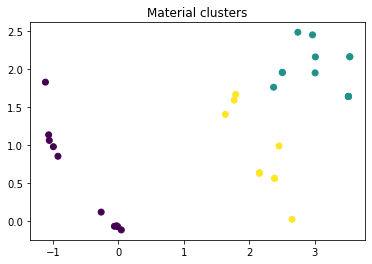

In [27]:
import matplotlib.pyplot as plt
plt.subplot()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Material clusters")

In [ ]:
writer = pd.ExcelWriter('data/Materials_properties_clust.xlsx')
df.to_excel(writer)
writer.save()

In [3]:
#creating excel table with all information (including kind of fracture and cluster)
#from Materials_properties_clust.xlsx (consists of Materials and their cluster)
import pandas as pd

Materials_cluster_path = 'C:/Users/kbock/Desktop/Fracto/data/Materials_properties_clust.xlsx'
excel_path ='C:/Users/kbock/Desktop/Fracto/data/raw_zoom_10_20_100/Raw_data_zoom100_224_224(12).xlsx'
excel_path_new ='C:/Users/kbock/Desktop/Fracto/data/raw_zoom_10_20_100/Raw_data_zoom100_224_224(12)_clustered.xlsx'
df = pd.read_excel(excel_path)
df["Material_cluster"] = None
df_clus = pd.read_excel(Materials_cluster_path)
newdf = pd.DataFrame(data=[])
for img_name in df["Fall-Nummer"]:
    Werkstoff_Name=df.loc[df["Fall-Nummer"]==img_name,["Werkstoff-Name"]].values[0][0]

    df.loc[df["Fall-Nummer"]==img_name,["Material_cluster"]]= df_clus.loc[df_clus["Werkstoff-Name"]==Werkstoff_Name]["Material_cluster"].to_string()[5:]



writer = pd.ExcelWriter(excel_path_new)
df.to_excel(writer)
writer.save()

# Extract features from images

## Tansferlearning with VGG16

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Multiply

from sklearn.cluster import KMeans

zoom_image_dir = "C:/Users/kbock/Desktop/Fracto/data/rawimg_zoom_10_20_100/zoom_100/0and1_224_224(12)/"
excel_path = "C:/Users/kbock/Desktop/Fracto/data/raw_zoom_10_20_100/Raw_data_zoom100_224_224(12)_clust.xlsx"

df = pd.read_excel(excel_path)#, engine='openpyxl')
y =df[["Bruchart-id"]]
y = np.array(y)
z =df[["Material_cluster"]]
z = np.array(z)
X = 0
for img_name in df["Fall-Nummer"]:
        image_path =zoom_image_dir + img_name + ".jpg"
        # load an image from file
        image = load_img(image_path, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image) 
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        try:
            X = np.append(X,image,axis=0)
        except Exception:
            X = image

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500


In [15]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

model = VGG16()
#model2 = Model(model.input, model.layers[-6].output) #conv5.3 mean  #bacc=0.763 #224_224 0,805 #340_385 0,83 # 0,83
#model2 = Model(model.input, model.layers[-10].output) #conv4.3 mean  #bacc=0.678 # 0,866 #0,866 #0,85
model2 = Model(model.input, model.layers[-14].output) #conv3.3 mean #bacc ##0,882 #0,84
#model2 = Model(model.input, model.layers[-18].output) #conv2.2 mean  #bacc=0.636 ###0,8
#model2 = Model(model.input, model.layers[-21].output) #conv1.2 mean  #bacc=0.593
model2.summary()

X_f = model2.predict(X)
X_mean_f = np.mean(X_f,axis=(1,2)) #mean
#X_max_f = np.amax(X_f,axis=(1,2)) #max
#import tensorflow as tf
#def gram_matrix(input_tensor):
#    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
#    input_shape = tf.shape(input_tensor)
#    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
#    return result/(num_locations)
#X_gram_f = np.reshape(gram_matrix(X_f),[len(y),-1]) #gram matrix

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

MemoryError: Unable to allocate 4.56 GiB for an array with shape (1524, 56, 56, 256) and data type float32

## LBP

In [17]:
from PIL import Image
import cv2
import os
from skimage import feature
import numpy as np
from skimage import io, color, img_as_ubyte
import mahotas as mt

class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints, #lbp image
            self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0, self.numPoints + 3),
            range=(0, self.numPoints + 2))
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        return hist, lbp
    
def LBP(image_dir_or_path, image_dir_lbp=None):
    desc= LocalBinaryPatterns(24,3)
    #for file in os.listdir(image_dir):
    #img = cv2.imread(image_dir+"/"+file,cv2.IMREAD_GRAYSCALE)
    img = cv2.imread(image_dir_or_path,cv2.IMREAD_GRAYSCALE)
    hist, img_lbp = desc.describe(image=img)
        #img_lbp = Image.fromarray(img_lbp, 'L')
        #img_lbp.save(image_dir_lbp+"/"+file)
    return hist

In [18]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.preprocessing import StandardScaler


table_dir="C:/Users/kbock/Desktop/Fracto/data/raw_zoom_10_20_100/"
image_dir= "C:/Users/kbock/Desktop/Fracto/data/rawimg_zoom_10_20_100/"
extracted_features_dir= "C:/Users/kbock/Desktop/Fracto/data/extracted_features_zoom_10_20_100/"
zoom =[10,20,100]
for z in zoom:
    zoom_table_path = os.path.join(table_dir +"Raw_data_zoom{}_224_224(12)_clust.xlsx".format(z))
    zoom_image_dir = image_dir + "zoom_{}/".format(z) + "0and1_224_224(12)/"
    df = pd.read_excel(zoom_table_path)#, engine='openpyxl')
    train_features = []

    for img_name in df["Fall-Nummer"]:
        image_path =zoom_image_dir + img_name + ".jpg"
        #calculate features
        features = LBP(image_path)
        # append the feature vector and label
        train_features.append(features)

    scaler = StandardScaler() 
    train_features= np.asarray(train_features)
    train_features = scaler.fit_transform(train_features)   
    table = pd.DataFrame(data=train_features)      
    table.to_csv(index=False, path_or_buf = extracted_features_dir+ "{}zoom_224_224(12)_clust/".format(z)+'{}zoom_LBP_hist.csv'.format(z))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


## GLCM with haralick features

In [2]:
from PIL import Image
import cv2
import os
from skimage import feature
import numpy as np
from skimage import io, color, img_as_ubyte
import mahotas as mt

        

def extract_haralick_features_from_glcm(image_path):
        #calculate haralick texture features for 4 types of adjacency (glcm)
        img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        #convert the image to grayscale
        #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        textures = mt.features.haralick(img)
        # take the mean and max of it and return it
        ht_mean = textures.mean(axis=0)
        ht_range = textures.max(axis=0) -textures.min(axis=0)
        ht = np.concatenate((ht_mean,ht_range),axis =None)
        return ht



In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.preprocessing import StandardScaler


table_dir="C:/Users/kbock/Desktop/Fracto/data/raw_zoom_10_20_100/"
image_dir= "C:/Users/kbock/Desktop/Fracto/data/rawimg_zoom_10_20_100/"
extracted_features_dir= "C:/Users/kbock/Desktop/Fracto/data/extracted_features_zoom_10_20_100/"
zoom =[10,20,100]
for z in zoom:
    zoom_table_path = os.path.join(table_dir +"Raw_data_zoom{}_224_224(12)_clust.xlsx".format(z))
    zoom_image_dir = image_dir + "zoom_{}/".format(z) + "0and1_224_224(12)/"
    df = pd.read_excel(zoom_table_path)#, engine='openpyxl')
    train_features = []

    for img_name in df["Fall-Nummer"]:
        image_path =zoom_image_dir + img_name + ".jpg"
        #calculate features
        features = extract_haralick_features_from_glcm(image_path)
        # append the feature vector and label
        train_features.append(features)

    scaler = StandardScaler() 
    train_features= np.asarray(train_features)
    train_features = scaler.fit_transform(train_features)
    
    table = pd.DataFrame(data=train_features)      
    #writer = pd.ExcelWriter(extracted_features_dir+ "{}zoom_224_224(12)_clust/".format(z)+'{a}zoom_GLCMharalickmeanandrang.xlsx'.format(a=z))
    #table.to_excel(writer)
    #writer.save()
    table.to_csv(index=False, path_or_buf = extracted_features_dir+ "{}zoom_224_224(12)_clust/".format(z)+'{}zoom_GLCMharalickmeanandrang.csv'.format(z)) 

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


## Standardize features

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_mean_f = scaler.fit_transform(X_mean_f)

## Save features

In [21]:
p= 20
excel_path = "C:/Users/kbock/Desktop/Fracto/data/raw_zoom_10_20_100/Raw_data_zoom{}_224_224(12)_clust.xlsx".format(p)
df = pd.read_excel(excel_path)#, engine='openpyxl')
#y =df[["Bruchart-id"]]
#z =df[["Material_cluster"]]
path= "C:/Users/kbock/Desktop/Fracto/data/extracted_features_zoom_10_20_100/" + "{}zoom_224_224(12)_clust/".format(p) +'{}zoom_LBP_hist.csv'.format(p)
table = pd.read_csv(path)
#save image features in csv file
#table = pd.DataFrame(data=X_mean_f)  
df_new = pd.concat([df[["Bruchart-id"]],df[["Material_cluster"]],table], axis=1)

df_new.to_csv(index=False, path_or_buf ="C:/Users/kbock/Desktop/Fracto/data/extracted_features_zoom_10_20_100/"+ "{}zoom_224_224(12)_clust/".format(p)+'{}zoom_LBP_hist.csv'.format(p)) 

# Model performance on whole dataset

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

model = MLPClassifier( alpha=1e-5, random_state=1,max_iter=100,solver="sgd")
#model = RandomForestClassifier()

In [33]:
model

MLPClassifier(alpha=1e-05, max_iter=10000, random_state=1, solver='lbfgs')

In [41]:
magnify= [100]

import pandas as pd
import numpy as np
import time
import numpy as np
from sklearn.model_selection import KFold
def Average(lst):
    return sum(lst) / len(lst)

kf = KFold(n_splits=6, random_state=0, shuffle=True)
#data = ["zoom_VGG16_conv33_mean_standardized.csv"]
data= ["zoom_VGG16_conv33_mean_standardized.csv"]
[#"zoom_LBP_hist.csv",
       #"zoom_GLCMharalickmeanandrang.csv" ,
       #"zoom_VGG16_conv33_mean_standardized.csv",
       #"zoom_VGG16_conv43_mean_standardized.csv",
       #"zoom_VGG16_conv53_mean_standardized.csv"
      ]
for p in magnify:
    for d in data:
        df = pd.read_csv("C:/Users/kbock/Desktop/Arbeitsordner/data/processed_data/"+ "{}zoom_224_224(12)_clust/".format(p)+'{}{}'.format(p,d))
        y =df[["Bruchart-id"]]
        y = np.array(y)
        z =df[["Material_cluster"]]
        z = np.array(z)
        X = df.drop(["Bruchart-id","Material_cluster"], axis=1).to_numpy()

        bacc = []
        bacc_cluster = []
        f1 = []
        f1_cluster_macro = []
        f1_cluster_weighted = []
        starttime = time.time()
        X_split = np.arange(len(X)/12)
        for train_index, test_index in kf.split(X_split):
            train_index = np.multiply(train_index,12)
            app= []
            for t in train_index:
                app.append(t+1)
                app.append(t+2)
                app.append(t+3)
                app.append(t+4)
                app.append(t+5)
                app.append(t+6)
                app.append(t+7)
                app.append(t+8)
                app.append(t+9)
                app.append(t+10)
                app.append(t+11)
            train_index = np.append(train_index,app)
            test_index = np.multiply(test_index,12)
            app= []
            for t in test_index:
                app.append(t+1)
                app.append(t+2)
                app.append(t+3)
                app.append(t+4)
                app.append(t+5)
                app.append(t+6)
                app.append(t+7)
                app.append(t+8)
                app.append(t+9)
                app.append(t+10)
                app.append(t+11)
            test_index = np.append(test_index,app)
            
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            z_train, z_test = z[train_index], z[test_index]
            y_train = np.ravel(y_train)
            z_train = np.ravel(z_train)
            y_test = np.ravel(y_test)
            z_test = np.ravel(z_test)

            model.fit(X_train, y_train)#, sample_weight=None)
            ypred = model.predict(X_test)
            bacc.append(balanced_accuracy_score(y_test,ypred))
            f1.append(f1_score(y_test,ypred))

            model.fit(X_train, z_train)#, sample_weight=None)
            zpred = model.predict(X_test)
            bacc_cluster.append(balanced_accuracy_score(z_test,zpred))
            f1_cluster_macro.append(f1_score(z_test,zpred,average='macro'))
            f1_cluster_weighted.append(f1_score(z_test,zpred,average='weighted'))
            
        endtime = time.time()
        print("############################")
        print("endtime-starttime: ", endtime-starttime)
        print("{}{}".format(p,d))
        print("bacc =", round(Average(bacc), 2))
        print("f1 =", round(Average(f1), 2))
        print("bacc_cluster =", round(Average(bacc_cluster), 2))
        print("f1_cluster macro =", round(Average(f1_cluster_macro), 2))
        print("f1_cluster weighted =", round(Average(f1_cluster_weighted), 2))

C:\Users\kbock\Anaconda3\envs\fracto\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kbock\Anaconda3\envs\fracto\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kbock\Anaconda3\envs\fracto\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kbock\Anaconda3\envs\fracto\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kbock\Anaconda3

############################
endtime-starttime:  14.352745056152344
100zoom_VGG16_conv33_mean_standardized.csv
bacc = 0.84
f1 = 0.8
bacc_cluster = 0.76
f1_cluster macro = 0.66
f1_cluster weighted = 0.85


C:\Users\kbock\Anaconda3\envs\fracto\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
